# Data Processing

This notebook shows simple data loading and manipulation with the DataFrames library (after the eponymous R data structure)

For more, see the [DataFrames documentation](http://juliadata.github.io/DataFrames.jl/stable/index.html) (not at the same comprehensive level as for example [Pandas](https://pandas.pydata.org/) for Python, or [data.table](https://cran.r-project.org/web/packages/data.table/vignettes/datatable-intro.html)/[dplyr](https://dplyr.tidyverse.org/) for R - which you should consider for more advanced data manipulation).

In [1]:
using Statistics: mean, std
using ExcelFiles: load
using Dates: Date, dayname
using Plots: plot
using DataFrames
using CSV

In [2]:
# Reading a csv file
df = CSV.read("data/SP500.csv")
head(df)

,Year,Month,Day,Return
,Int64⍰,Int64⍰,Int64⍰,Float64⍰
1,1973,1,2,0.8895
2,1973,1,3,0.3946
3,1973,1,4,-0.1422
4,1973,1,5,0.3936
5,1973,1,8,-0.0167
6,1973,1,9,-0.1001


Access columns with `:`, and assign a new date column

In [3]:
df[:Ymd] = string.(df[:Year], "-", df[:Month], "-", df[:Day])
head(df)

,Year,Month,Day,Return,Ymd
,Int64⍰,Int64⍰,Int64⍰,Float64⍰,String
1,1973,1,2,0.8895,1973-1-2
2,1973,1,3,0.3946,1973-1-3
3,1973,1,4,-0.1422,1973-1-4
4,1973,1,5,0.3936,1973-1-5
5,1973,1,8,-0.0167,1973-1-8
6,1973,1,9,-0.1001,1973-1-9


Converting to a date object instead

In [4]:
df[:Ymd] = Date.(df[:Year], df[:Month], df[:Day])
head(df)

,Year,Month,Day,Return,Ymd
,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Date
1,1973,1,2,0.8895,1973-01-02
2,1973,1,3,0.3946,1973-01-03
3,1973,1,4,-0.1422,1973-01-04
4,1973,1,5,0.3936,1973-01-05
5,1973,1,8,-0.0167,1973-01-08
6,1973,1,9,-0.1001,1973-01-09


The average return each week day

In [5]:
df[:dayname] = dayname.(df[:Ymd])
by(df, :dayname, x -> mean(x.Return))

,dayname,x1
,String,Float64
1,Tuesday,0.0580574
2,Wednesday,0.06043
3,Thursday,0.0287795
4,Friday,0.0286449
5,Monday,-0.0185232


Simple summary statistics

In [6]:
mean(df[:Return]), std(df[:Return])

(0.03224284265830953, 1.0882938071203023)

Plotting

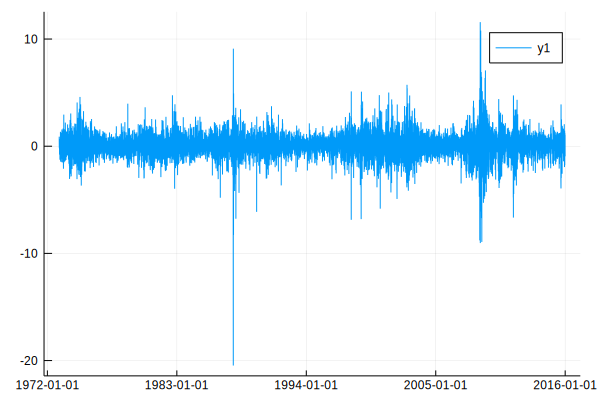

In [7]:
plot(df[:Ymd], df[:Return])

Loading Excel data

In [8]:
df = DataFrame(load("data/rates.xls", "ConsumptionAnnual")) 
head(df)

,Year,C,Inflation,Stock,T-Bill
,Float64,Float64,Float64,Float64,Float64
1,1929.0,100.0,0.5848,-15.0955,4.9219
2,1930.0,95.6605,-6.3953,-28.9005,2.7487
3,1931.0,93.0377,-9.3168,-44.3873,0.707
4,1932.0,85.8687,-10.2739,-7.9449,0.8713
5,1933.0,83.2777,0.7634,57.4131,0.4655
6,1934.0,87.8716,1.5152,3.1843,0.3301
